# Bank Dataset

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt

Loading data from .csv file

In [2]:
bank_df=pd.read_csv('bank_marketing_1.txt')

Inspecting the dataset

In [3]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Validating the duplicate data

In [5]:
bank_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [6]:
bank_df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Training and Test the dataset

In [7]:
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
bank_df["y"].replace({"yes": 1, "no": 0}, inplace=True)

In [9]:
label=bank_df.y.value_counts()
print(label)

0    39922
1     5289
Name: y, dtype: int64


In [10]:
imbalance_dataset=(label[0]/(label[1]+label[0]))*100
print(imbalance_dataset)

88.30151954170445


In [11]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
# Converting string variables to a categorical
from sklearn.preprocessing import LabelEncoder

bank_df[["job"]] = bank_df[["job"]].apply(LabelEncoder().fit_transform)
bank_df[["marital"]] = bank_df[["marital"]].apply(LabelEncoder().fit_transform)
bank_df[["education"]] = bank_df[["education"]].apply(LabelEncoder().fit_transform)
bank_df[["default"]] = bank_df[["default"]].apply(LabelEncoder().fit_transform)
bank_df[["housing"]] = bank_df[["housing"]].apply(LabelEncoder().fit_transform)
bank_df[["contact"]] = bank_df[["contact"]].apply(LabelEncoder().fit_transform)
bank_df[["month"]] = bank_df[["month"]].apply(LabelEncoder().fit_transform)
bank_df[["loan"]] = bank_df[["loan"]].apply(LabelEncoder().fit_transform)
bank_df[["poutcome"]] = bank_df[["poutcome"]].apply(LabelEncoder().fit_transform)

bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [13]:
# Partitioning the data into X and y
X=bank_df.iloc[:,1:16]
y=bank_df.iloc[:,16:17]
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


# Decision Tree Classifier using Supervised Learning 

All DT scores: 
{'fit_time': array([0.01112533, 0.01013231, 0.01220894, 0.00999379, 0.01023698,
       0.01012731, 0.01011944, 0.01014304, 0.01014805, 0.01011753]), 'score_time': array([0.00299954, 0.00210905, 0.00501871, 0.00199914, 0.00202107,
       0.00299859, 0.00199938, 0.0019989 , 0.00210595, 0.00099993]), 'test_score': array([0.88176796, 0.89060773, 0.8961326 , 0.87942478, 0.88495575,
       0.88384956, 0.88938053, 0.89159292, 0.88274336, 0.89048673])}
Accuracy mean is:  0.8870941915611402
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7964
           1       0.60      0.21      0.31      1079

    accuracy                           0.89      9043
   macro avg       0.75      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043



C:\Users\suchi\anaconda3\envs\tensor\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


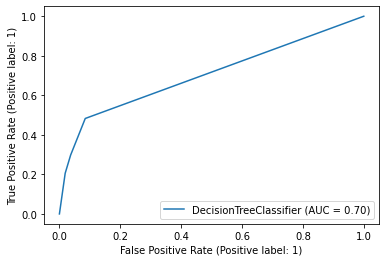

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate


from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dt_clf = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=2, min_samples_leaf=4)

dt_clf.fit(X_train, y_train)

old_dt_scores = cross_validate(dt_clf, X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=dt_clf.predict(X_test)
#Output
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is: ", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
mplt.show() 

# Random Forest Classifier

C:\Users\suchi\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Random Forest scores: 
{'fit_time': array([0.41672683, 0.41560817, 0.42189097, 0.40928674, 0.4211309 ,
       0.41088438, 0.42069626, 0.4135406 , 0.41464281, 0.41125226]), 'score_time': array([0.02329397, 0.02328277, 0.02214479, 0.02338982, 0.02123928,
       0.02323723, 0.02323294, 0.02230096, 0.02624655, 0.02225542]), 'test_score': array([0.88066298, 0.88508287, 0.8839779 , 0.88716814, 0.88053097,
       0.87942478, 0.88163717, 0.88163717, 0.88384956, 0.88495575])}
Approximate mean is: 0.8828927296729085
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7964
           1       0.84      0.03      0.06      1079

    accuracy                           0.88      9043
   macro avg       0.86      0.51      0.50      9043
weighted avg       0.88      0.88      0.83      9043



C:\Users\suchi\anaconda3\envs\tensor\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


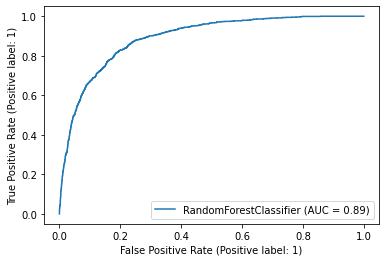

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from ipykernel import kernelapp as app

#Random Forest Classifier initialise
rf_clf = RandomForestClassifier(criterion="gini", random_state=10, max_depth=4, min_samples_leaf=4)

#RF_Classifier Training
rf_clf.fit(X_train, y_train)

#Cross Validating RF
old_rf_scores =cross_validate(rf_clf, X_test, y_test.values.ravel(), cv=10)

y_prodcut = rf_clf.predict(X_test)

#Output
print("Random Forest scores: ")
print(old_rf_scores)

print("Approximate mean is:", old_rf_scores['test_score'].mean())

print(classification_report(y_test, y_prodcut))
plot_roc_curve(rf_clf, X_test, y_test.values.ravel())
mplt.show() 

In [16]:
from sklearn.preprocessing import StandardScaler

d_c0=bank_df[bank_df['y']==0]
d_c1=bank_df[bank_df['y']==1]

l0=int(len(d_c0)/10)
l1=int(len(d_c1)/10)

init0=0
init1=0

bins=[]

#original Imbalance
or_imbal=(label[0]/(label[1]+label[0]))*100
print("Original Imbalance: {} %".format(or_imbal))

#Creating 10 bins keeping imbalance percentage as original
for i in range(10):
    curr_bin=pd.concat([d_c0.iloc[init0:init0+l0,:],d_c1.iloc[init1:init1+l1,:]])
    label_c=curr_bin.y.value_counts()
    imbalance=(label_c[0]/(label[0]+label_c[1]))*100
    print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
    bins.append(curr_bin.values)
    init0+=l0
    init1+=l1


# Preprocessing 9 Bins data as X_train and curr_bin as X_test
bin9=np.vstack((bins[j] for j in range(10) if j!=i )) #combining 9 bins data
data=pd.DataFrame(bin9)
data.columns=bank_df.columns

X_train=data.iloc[:,1:16]
y_train=data.iloc[:,16:17]
X_test=curr_bin.iloc[:,1:16]
y_test=curr_bin.iloc[:,16:17]

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


Original Imbalance: 88.30151954170445 %
Class imbalance ratio in bin 0 : 9.868974042027194 %
Class imbalance ratio in bin 1 : 9.868974042027194 %
Class imbalance ratio in bin 2 : 9.868974042027194 %
Class imbalance ratio in bin 3 : 9.868974042027194 %
Class imbalance ratio in bin 4 : 9.868974042027194 %
Class imbalance ratio in bin 5 : 9.868974042027194 %
Class imbalance ratio in bin 6 : 9.868974042027194 %
Class imbalance ratio in bin 7 : 9.868974042027194 %
Class imbalance ratio in bin 8 : 9.868974042027194 %
Class imbalance ratio in bin 9 : 9.868974042027194 %


C:\Users\suchi\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


# Unsupervised Machine Learning Phase - Identifying the number of clusters in the dataset using the Elbow method and the Silhouette method

silhouette 2th score:0.270511 
Distortion or average SSE for 2th cluster is:3.320537 
silhouette 3th score:0.141205 
Distortion or average SSE for 3th cluster is:3.110656 
silhouette 4th score:0.151963 
Distortion or average SSE for 4th cluster is:3.020653 
silhouette 5th score:0.131325 
Distortion or average SSE for 5th cluster is:2.924931 
silhouette 6th score:0.165971 
Distortion or average SSE for 6th cluster is:2.852089 
silhouette 7th score:0.136023 
Distortion or average SSE for 7th cluster is:2.824509 
silhouette 8th score:0.148915 
Distortion or average SSE for 8th cluster is:2.724919 
silhouette 9th score:0.149415 
Distortion or average SSE for 9th cluster is:2.721677 
silhouette 10th score:0.150667 
Distortion or average SSE for 10th cluster is:2.668185 
silhouette 11th score:0.140457 
Distortion or average SSE for 11th cluster is:2.637925 
silhouette 12th score:0.136201 
Distortion or average SSE for 12th cluster is:2.581743 
silhouette 13th score:0.136208 
Distortion or av

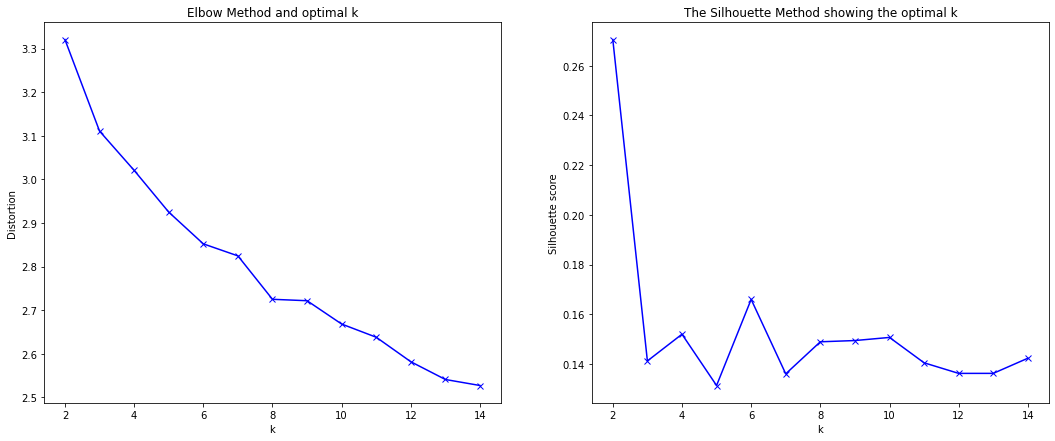

In [17]:
 # Elbow Method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
silhouette_scores=[]
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_std)
    kmeanModel.fit(X_train_std)
    labels = kmeanModel.labels_
    silhouette_score=metrics.silhouette_score(X_train_std, labels, metric='euclidean')
    silhouette_scores.append(silhouette_score)
    print("silhouette %dth score:%f "%(k, silhouette_score))
    avg_sse=(sum(np.min(cdist(X_train_std, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_std.shape[0])
    distortions.append(avg_sse)
    print("Distortion or average SSE for %dth cluster is:%f "%(k, avg_sse))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Distortion')
ax1.set_title('Elbow Method and optimal k')
ax2.plot(K, silhouette_scores, 'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette score')
ax2.set_title('The Silhouette Method showing the optimal k')
plt.show()


# Silhouette Method

For n_clusters = 2 The average silhouette_score is : 0.27051133877029243
For n_clusters = 3 The average silhouette_score is : 0.14122654657638142
For n_clusters = 4 The average silhouette_score is : 0.1519686451686748
For n_clusters = 5 The average silhouette_score is : 0.16291829158618057
For n_clusters = 6 The average silhouette_score is : 0.1409719978211393
For n_clusters = 7 The average silhouette_score is : 0.15137118246371106
For n_clusters = 8 The average silhouette_score is : 0.1489083852646497


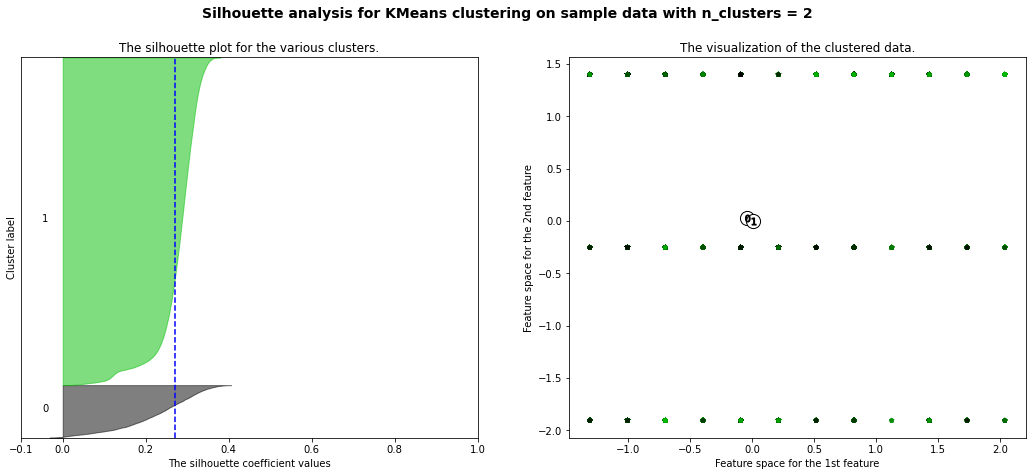

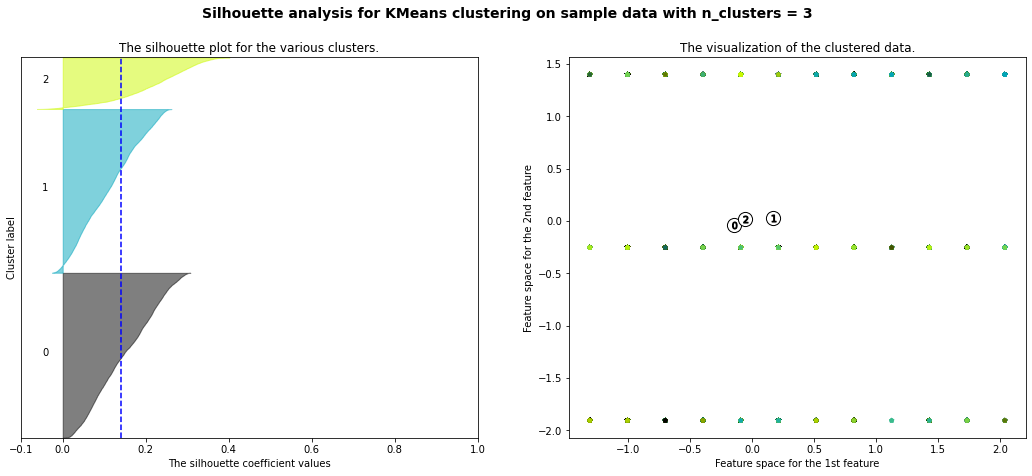

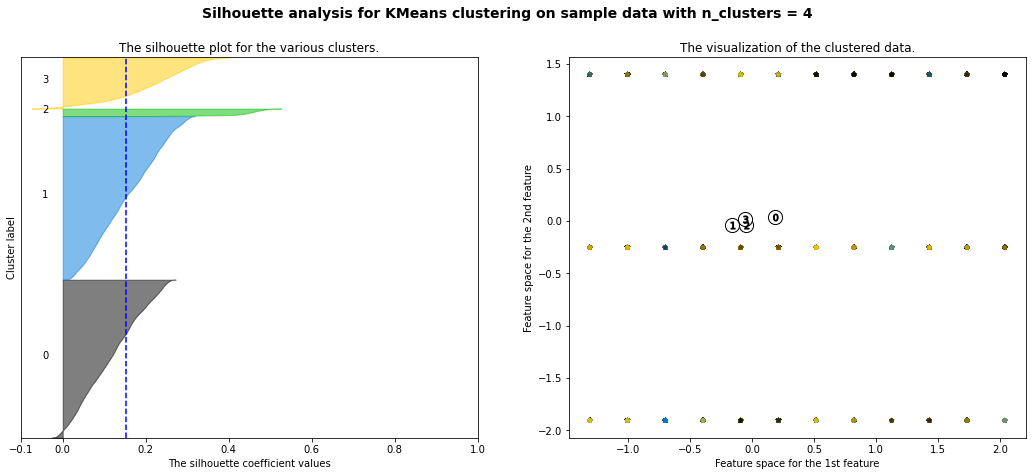

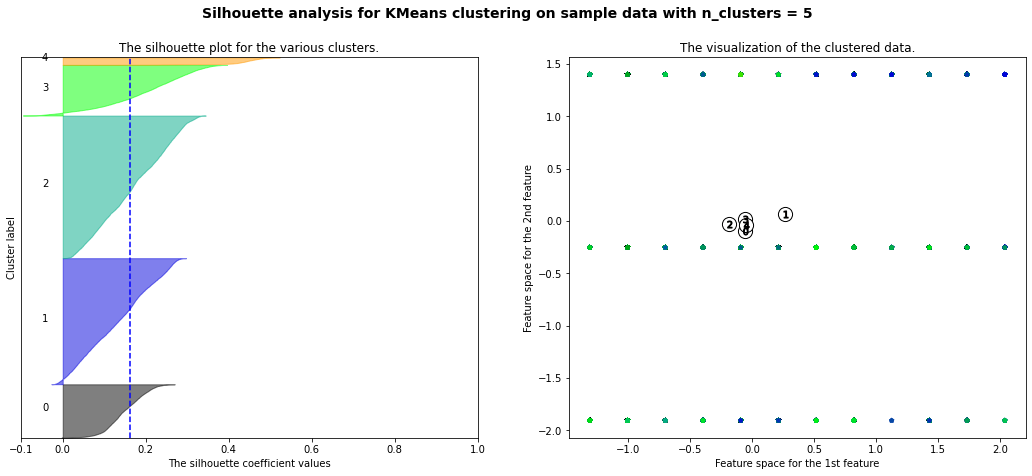

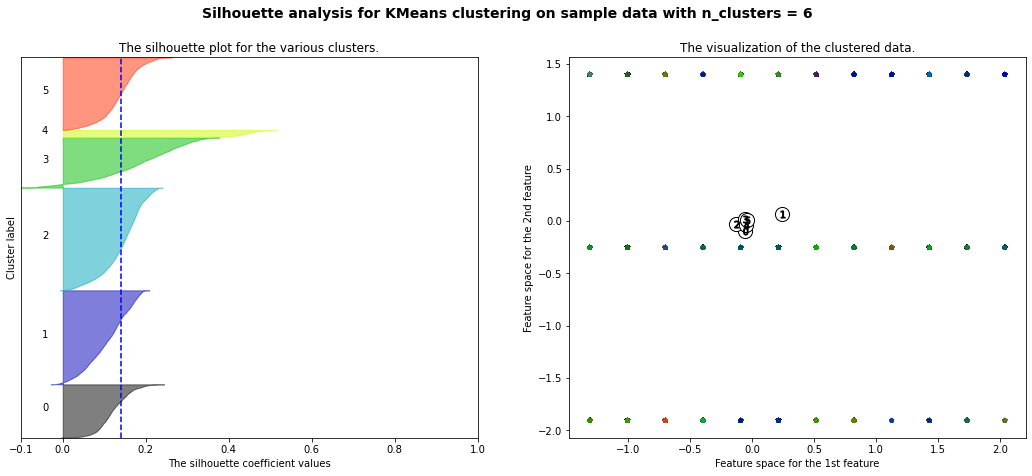

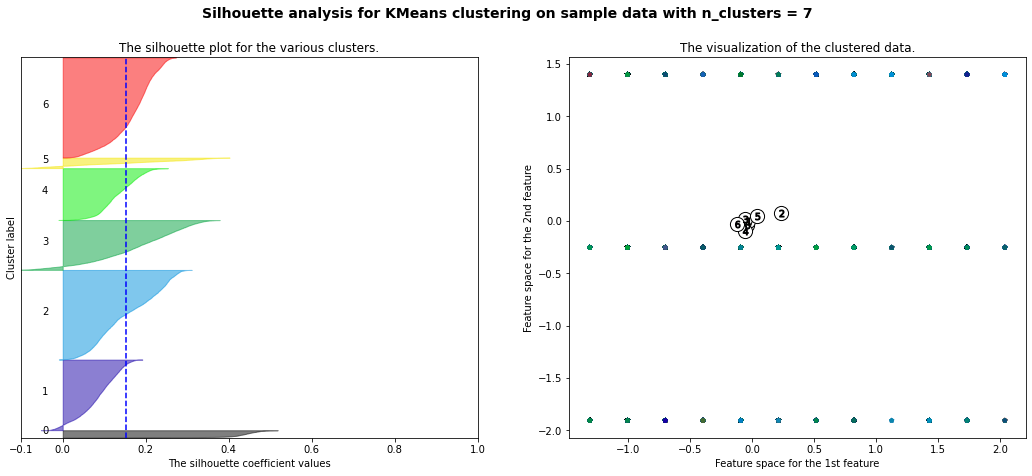

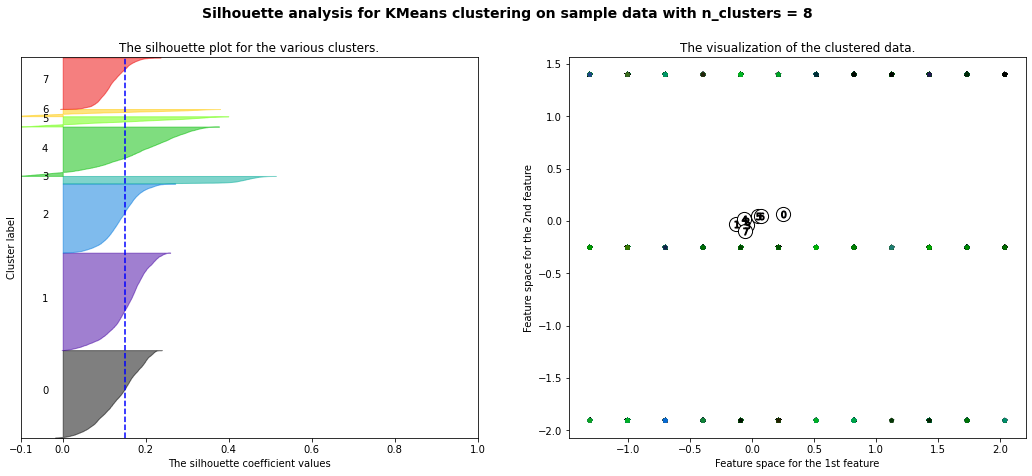

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


for n_clusters in range(2,9):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train_std) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_std)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.5)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="blue", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_std[:, 0], X_train_std[:, 1], marker='p', s=30, lw=0, alpha=0.5,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Running k-means clustering using optimal k

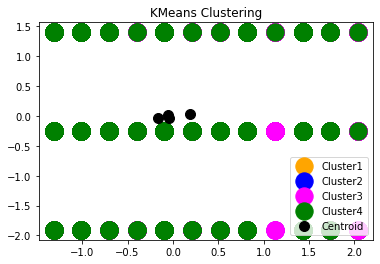

In [19]:
# Implementing the KMeans Algorithm with the optimal no.of Clusters
kmeans = KMeans(n_clusters =4, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train_std)
cluster_data=data

cols=list(cluster_data.columns)



# Plotting the results
plt.scatter(X_train_std[y_kmeans == 0, 0], X_train_std[y_kmeans == 0, 1], s = 300, c = 'orange', label = 'Cluster1')
plt.scatter(X_train_std[y_kmeans == 1, 0], X_train_std[y_kmeans == 1, 1], s = 300, c = 'blue', label = 'Cluster2')
plt.scatter(X_train_std[y_kmeans == 2, 0], X_train_std[y_kmeans == 2, 1], s = 300, c = 'magenta', label = 'Cluster3')
plt.scatter(X_train_std[y_kmeans == 3, 0], X_train_std[y_kmeans == 3, 1], s = 300, c = 'green', label = 'Cluster4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'Black', label = 'Centroid')
plt.title('KMeans Clustering')
plt.legend(loc="lower right")
plt.show()

In [20]:
cluster_data["Cluster label"]=kmeans.labels_

cluster_info = pd.DataFrame()

cluster_info=pd.DataFrame(columns=["Centroid","Cluster label","Min_cls1_cnt_clusterwise","Maj_cls0_cnt_clusterwise"])

for i in cluster_data["Cluster label"].unique():
    count1=np.sum(cluster_data[(cluster_data['y']==1) & (cluster_data["Cluster label"]==i)].count().unique())
    count0=np.sum(cluster_data[(cluster_data['y']==0) & (cluster_data["Cluster label"]==i)].count().unique())
    center=kmeans.cluster_centers_[i]
    cluster_info = cluster_info.append(pd.Series(data={'Centroid':center,'Cluster label':i, 'Min_cls1_cnt_clusterwise':count1, 'Maj_cls0_cnt_clusterwise':count0}), ignore_index=True)


cluster_info

,Centroid,Cluster label,Min_cls1_cnt_clusterwise,Maj_cls0_cnt_clusterwise
0,"[-0.16155434578565378, -0.03952616962057787, -...",0,1163,16335
1,"[-0.04752122895876174, -0.03671687161380231, -...",3,52,749
2,"[0.18830905166959408, 0.03610291778128197, 0.1...",2,2416,14493
3,"[-0.05492067141597635, 0.0209509707954361, 0.0...",1,1121,4351
